see: https://www.tensorflow.org/text/tutorials/text_classification_rnn

In [41]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
print("version:", tf.__version__)
print("gpu available:", tf.config.list_physical_devices("GPU"))
print("gpu name:", tf.test.gpu_device_name())
print()


# get dataset
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
print(train_dataset.element_spec)
for example, label in train_dataset.take(1):
    print('text: ', example.numpy())
    print('label: ', label.numpy())
print()


# batch
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


# encode
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))


# define model
model = tf.keras.Sequential([
    encoder, # pre-trained text encoder
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()), # vocab size
        output_dim=64, # embedding size
        mask_zero=True), # handle variable length input
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), # bidirectional lstm with 64 units
    tf.keras.layers.Dense(64, activation='relu'), # dense layer with 64 units
    tf.keras.layers.Dense(1) # output layer
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


# train
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

# evaluate
test_loss, test_acc = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


version: 2.15.1
gpu available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
gpu name: /device:GPU:0

(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


2024-05-10 18:17:10.855010: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-10 18:17:10.855165: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-05-10 18:17:11.084243: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0



Epoch 1/10


2024-05-10 18:17:16.105405: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_10.


391/391 [==============================] - 99s 244ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 2/10


2024-05-10 18:18:52.512055: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 93s 238ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.4917
Epoch 3/10


2024-05-10 18:20:26.007127: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 93s 237ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 4/10


2024-05-10 18:21:59.333849: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 93s 238ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.4917
Epoch 5/10


2024-05-10 18:23:32.660029: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 95s 242ms/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4917
Epoch 6/10


2024-05-10 18:25:07.279377: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 96s 247ms/step - loss: 0.6945 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.4917
Epoch 7/10


2024-05-10 18:26:43.728293: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 564s 1s/step - loss: 0.6929 - accuracy: 0.5006 - val_loss: 0.6929 - val_accuracy: 0.4917
Epoch 8/10


2024-05-10 18:36:08.152889: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 117s 299ms/step - loss: 0.6927 - accuracy: 0.5028 - val_loss: 0.6941 - val_accuracy: 0.4922
Epoch 9/10


2024-05-10 18:38:05.612786: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 111s 284ms/step - loss: 0.6922 - accuracy: 0.5039 - val_loss: 0.6929 - val_accuracy: 0.4943
Epoch 10/10


2024-05-10 18:39:57.099571: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


  1/391 [..............................] - ETA: 54s - loss: 0.7106 - accuracy: 0.5156

2024-05-10 18:41:47.877277: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


391/391 [==============================] - 63s 160ms/step - loss: 0.7049 - accuracy: 0.5042
Test Loss: 0.7049423456192017
Test Accuracy: 0.5042399764060974


(0.0, 0.7031051099300385)

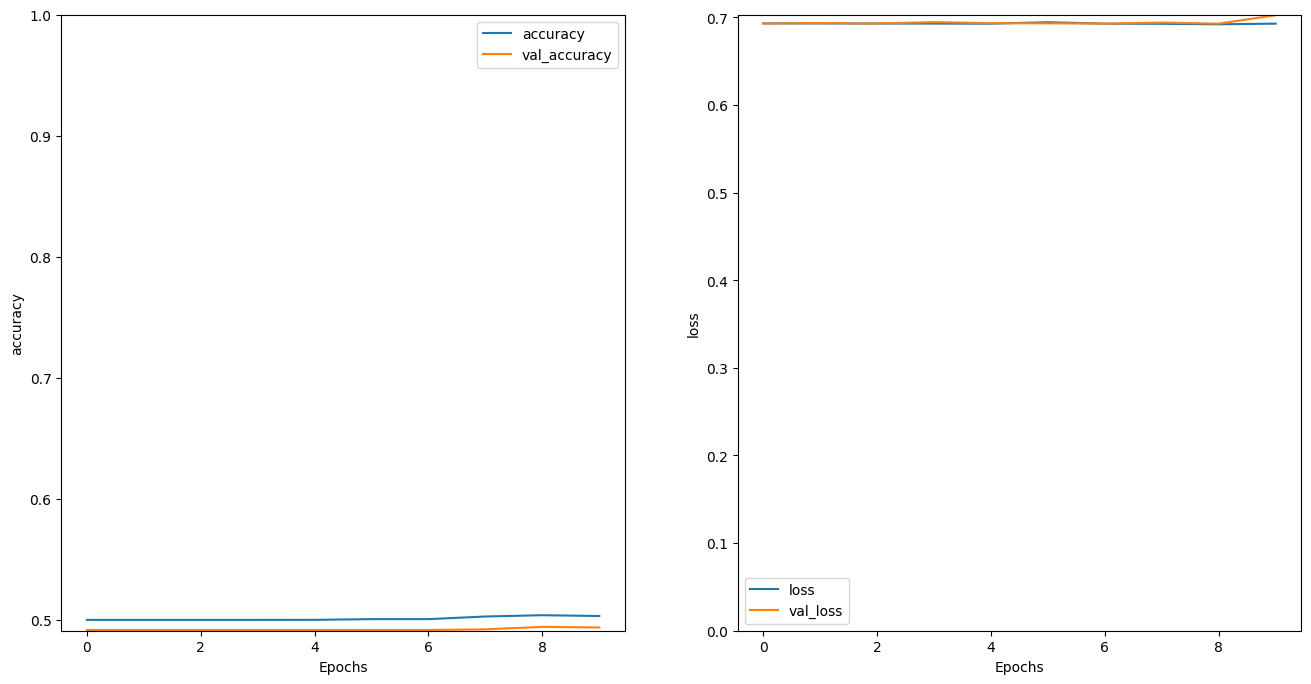

In [43]:
%matplotlib inline

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [36]:
"""
before training
"""

# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 27ms/step
[0.01294524]
1/1 [==============================] - 1s 994ms/step
[0.0383963]


In [44]:
"""
after training
"""

# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 4s 4s/step
[-0.06378548]
1/1 [==============================] - 0s 257ms/step
[0.3247453]


if the sentiment classification is positive, then it returns a positive value, else it returns a negative value.

you can keep adding more layers to the model to improve the accuracy. it isn't that great right now.

but this shows something to get started with.